In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

data_path = 'spotify-2023.csv'
spotify_data = pd.read_csv(data_path, encoding='ISO-8859-1')

display(spotify_data.head())


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [41]:

spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')

spotify_data.dropna(subset=['streams'], inplace=True)

spotify_data_sorted = spotify_data.sort_values(by='streams', ascending=False)

top_100_songs = spotify_data_sorted.head(100)

top_100_songs = top_100_songs.reset_index(drop=True)

display(top_100_songs.head())


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
1,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8
2,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3
3,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,Minor,82,54,59,69,0,18,10
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5


In [68]:
positions = [1, 25, 50, 75, 100]


for pos in positions:

    adjusted_pos = pos - 1

    if adjusted_pos < len(top_100_songs):
        song = top_100_songs.iloc[adjusted_pos]
        print(f"Song No. {pos}:")
        print(f"Track Name: {song['track_name']}")
        print(f"Streams: {song['streams']}")
        print("") 
    else:
        print(f"Song No. {pos} is not available in the top 100 songs.\n")


Song No. 1:
Track Name: Blinding Lights
Streams: 3703895074.0

Song No. 25:
Track Name: Shallow
Streams: 2159346687.0

Song No. 50:
Track Name: MONTERO (Call Me By Your Name)
Streams: 1735441776.0

Song No. 75:
Track Name: Somebody That I Used To Know
Streams: 1457139296.0

Song No. 100:
Track Name: Danza Kuduro
Streams: 1279434863.0



In [43]:
columns_of_interest = [
    'track_name', 'artist(s)_name', 'bpm',
    'danceability_%', 'energy_%', 'liveness_%', 'speechiness_%'
]

top_100_songs_filtered = top_100_songs[columns_of_interest]


display(top_100_songs_filtered.head())


,track_name,artist(s)_name,bpm,danceability_%,energy_%,liveness_%,speechiness_%
0,Blinding Lights,The Weeknd,171,50,80,9,7
1,Shape of You,Ed Sheeran,96,83,65,9,8
2,Someone You Loved,Lewis Capaldi,110,50,41,11,3
3,Dance Monkey,Tones and I,98,82,59,18,10
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",90,76,50,7,5


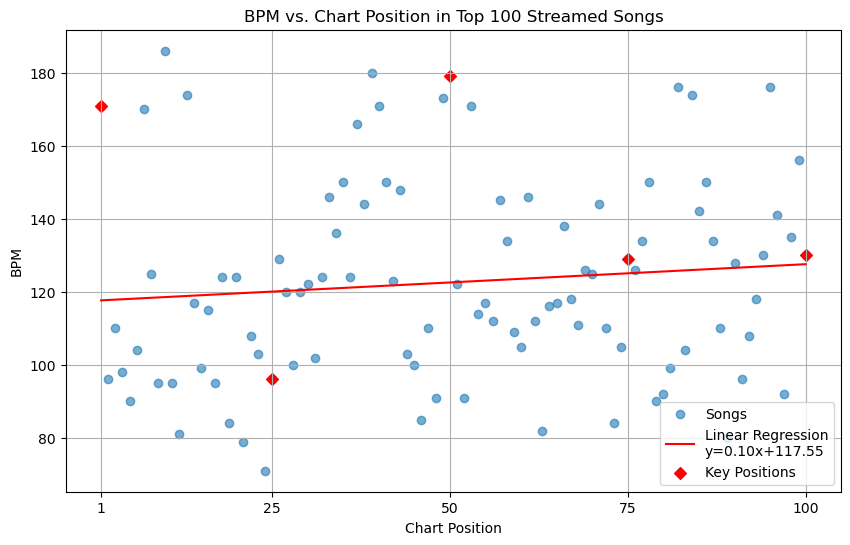

Correlation coefficient: 0.10470316439562567


In [70]:

# Y-axis: BPM values
bpm_values = top_100_songs_filtered['bpm'].values

# X-axis: Chart positions (1 to 100)
chart_positions = np.arange(1, 101)

slope, intercept, r_value, p_value, std_err = st.linregress(chart_positions, bpm_values)
line = slope * chart_positions + intercept

plt.figure(figsize=(10, 6))
plt.scatter(chart_positions, bpm_values, alpha=0.6, label='Songs')
plt.plot(chart_positions, line, 'r', label=f'Linear Regression\ny={slope:.2f}x+{intercept:.2f}')

highlight_positions = [1, 25, 50, 75, 100]
highlight_bpm = top_100_songs_filtered.loc[top_100_songs_filtered.index.isin([0, 24, 49, 74, 99]), 'bpm']
plt.scatter(highlight_positions, highlight_bpm, color='red', marker='D', label='Key Positions')

# labels and title
plt.xlabel('Chart Position')
plt.ylabel('BPM')
plt.title('BPM vs. Chart Position in Top 100 Streamed Songs')
plt.xticks([1, 25, 50, 75, 100])  

plt.legend()

# Show the plot
plt.grid(True)
plt.show()

print(f"Correlation coefficient: {r_value}")


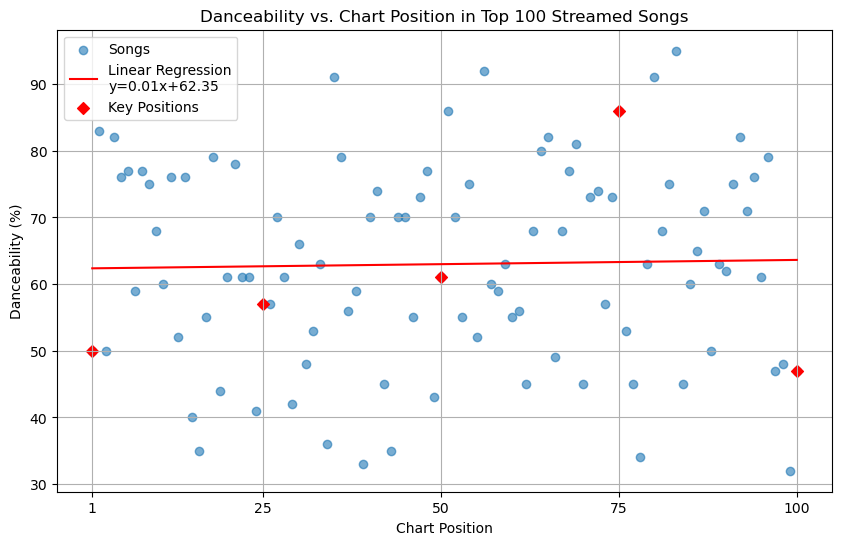

Correlation coefficient: 0.024710127287500324


In [69]:

# Y-axis: danceability_% values
danceability_values = top_100_songs_filtered['danceability_%'].values

slope, intercept, r_value, p_value, std_err = st.linregress(chart_positions, danceability_values)
line = slope * chart_positions + intercept

plt.figure(figsize=(10, 6))
plt.scatter(chart_positions, danceability_values, alpha=0.6, label='Songs')
plt.plot(chart_positions, line, 'r', label=f'Linear Regression\ny={slope:.2f}x+{intercept:.2f}')

highlight_positions = [1, 25, 50, 75, 100]
highlight_danceability = top_100_songs_filtered.loc[top_100_songs_filtered.index.isin([0, 24, 49, 74, 99]), 'danceability_%']
plt.scatter(highlight_positions, highlight_danceability, color='red', marker='D', label='Key Positions')

# labels and title
plt.xlabel('Chart Position')
plt.ylabel('Danceability (%)')
plt.title('Danceability vs. Chart Position in Top 100 Streamed Songs')
plt.xticks([1, 25, 50, 75, 100]) 

plt.legend()

# Show the plot
plt.grid(True)
plt.show()

print(f"Correlation coefficient: {r_value}")


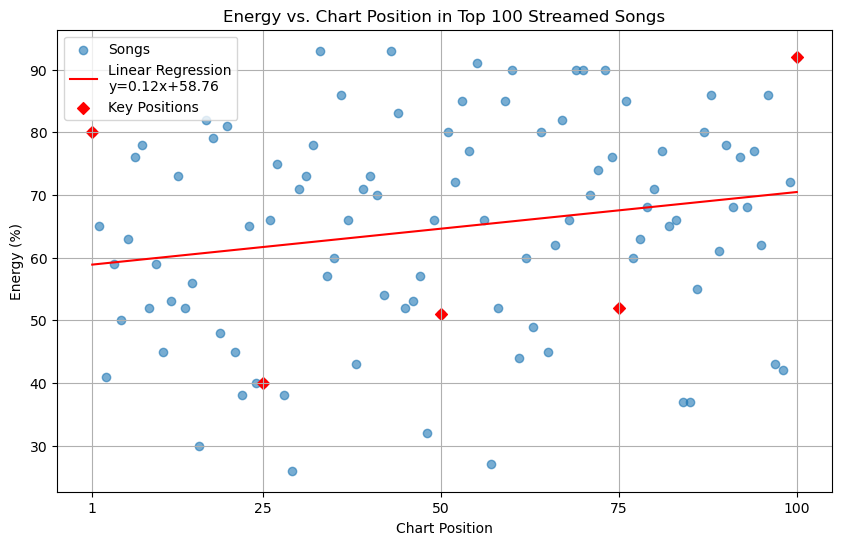

Correlation coefficient: 0.20107963091030637


In [62]:

# Y-axis: energy_% values
energy_values = top_100_songs_filtered['energy_%'].values

# linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(chart_positions, energy_values)
line = slope * chart_positions + intercept

plt.figure(figsize=(10, 6))
plt.scatter(chart_positions, energy_values, alpha=0.6, label='Songs')
plt.plot(chart_positions, line, 'r', label=f'Linear Regression\ny={slope:.2f}x+{intercept:.2f}')

highlight_positions = [1, 25, 50, 75, 100]
highlight_energy = top_100_songs_filtered.loc[top_100_songs_filtered.index.isin([0, 24, 49, 74, 99]), 'energy_%']
plt.scatter(highlight_positions, highlight_energy, color='red', marker='D', label='Key Positions')

# labels and title
plt.xlabel('Chart Position')
plt.ylabel('Energy (%)')
plt.title('Energy vs. Chart Position in Top 100 Streamed Songs')
plt.xticks([1, 25, 50, 75, 100])  

plt.legend()

# Show the plot
plt.grid(True)
plt.show()

print(f"Correlation coefficient: {r_value}")


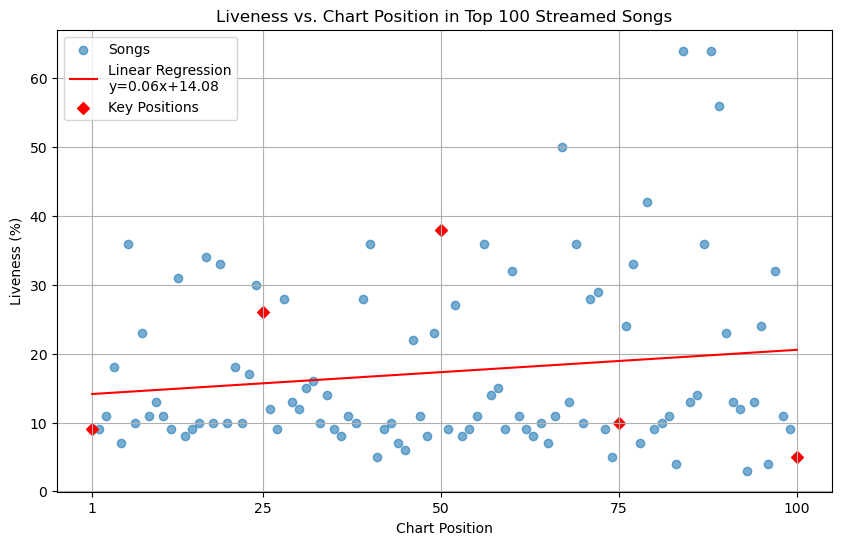

Correlation coefficient: 0.14629378960516337


In [55]:

# Y-axis: liveness_% values
liveness_values = top_100_songs_filtered['liveness_%'].values

# X-axis: Chart positions (1 to 100)
chart_positions = np.arange(1, 101)

# linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(chart_positions, liveness_values)
line = slope * chart_positions + intercept

plt.figure(figsize=(10, 6))
plt.scatter(chart_positions, liveness_values, alpha=0.6, label='Songs')
plt.plot(chart_positions, line, 'r', label=f'Linear Regression\ny={slope:.2f}x+{intercept:.2f}')

highlight_positions = [1, 25, 50, 75, 100]
highlight_liveness = top_100_songs_filtered.loc[top_100_songs_filtered.index.isin([0, 24, 49, 74, 99]), 'liveness_%']
plt.scatter(highlight_positions, highlight_liveness, color='red', marker='D', label='Key Positions')

# labels and title
plt.xlabel('Chart Position')
plt.ylabel('Liveness (%)')
plt.title('Liveness vs. Chart Position in Top 100 Streamed Songs')
plt.xticks([1, 25, 50, 75, 100]) 

plt.legend()

# Show the plot
plt.grid(True)
plt.show()

print(f"Correlation coefficient: {r_value}")

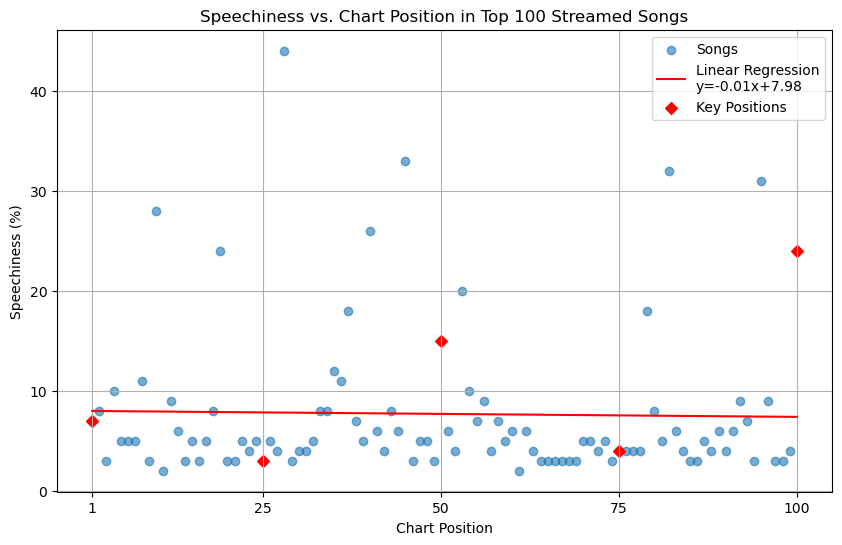

Correlation coefficient: -0.022631506822313616


In [50]:

# Prepare the data for plotting
speechiness_values = top_100_songs_filtered['speechiness_%'].values
chart_positions = np.arange(1, 101)

# linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(chart_positions, speechiness_values)
line = slope * chart_positions + intercept

plt.figure(figsize=(10, 6))
plt.scatter(chart_positions, speechiness_values, alpha=0.6, label='Songs')
plt.plot(chart_positions, line, 'r', label=f'Linear Regression\ny={slope:.2f}x+{intercept:.2f}')

highlight_positions = [1, 25, 50, 75, 100]
highlight_speechiness = top_100_songs_filtered.loc[top_100_songs_filtered.index.isin([0, 24, 49, 74, 99]), 'speechiness_%']
plt.scatter(highlight_positions, highlight_speechiness, color='red', marker='D', label='Key Positions')

# labels and title
plt.xlabel('Chart Position')
plt.ylabel('Speechiness (%)')
plt.title('Speechiness vs. Chart Position in Top 100 Streamed Songs')
plt.xticks([1, 25, 50, 75, 100]) 

plt.legend()

# Show the plot
plt.grid(True)
plt.show()

print(f"Correlation coefficient: {r_value}")

